In [1]:
# import dependencies
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
csvpath = "merged_data.csv"


In [2]:
df = pd.read_csv(csvpath)
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


In [3]:
race_demo = df["Race"].value_counts()
race_demo

5    13391
7     1831
2      964
3      919
1       35
4       27
Name: Race, dtype: int64

In [4]:
def interest(rate,amount,years):
    t = years*12
    m_rate = rate/12.
    month = amount * (m_rate*(1+m_rate)**t)/(((1+m_rate)**t)-1)
    final = round(month*years*12,2)
    return(final)
def total_paid(amount,rate,LTV,years):
    loan = interest(rate,amount,years)
    tot = amount/LTV # total value of home before interest on loan
    down_pay = round(tot-amount,2)
    total = loan + down_pay
    return(total)

In [5]:
amount = np.array(df['Amount'].tolist())
ltv = np.array(df['LTV'].tolist())
rat = np.array(df['Rate'].tolist())
tp = []
for amount,ltv,rate in zip(amount,ltv,rat):
    tp.append(total_paid(amount,rate,ltv,30))
df['Total'] = tp
df.head()

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score,Total
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5,319123.86
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5,447696.82
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5,505123.90
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5,532544.11
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5,1535064.56


In [6]:
years = df['Year'].unique()
rates = []
totals = []
incomes = []
new_ratio = []
for year in years:
    temp_df = df.loc[df['Year'] == year,:]
    rates.append(np.median(temp_df['Rate']))
    incomes.append(temp_df['Income'].median())
    totals.append(np.median(temp_df['Total']))
    total_ratio = []
    for a,b in zip(temp_df['Total'],temp_df['Income']):
        total_ratio.append(a/b)
    new_ratio.append(np.median(total_ratio))

In [7]:
# create dataframe of necessary columns
df = df[["Year", "Total", "Income", "Race", "Credit Score", "Rate"]]
df = df.groupby(["Year", "Race"]).median()
df["Total/Inc Ratio"] = df["Total"]/df["Income"]
df = df.reset_index("Race")
df = df[["Race", "Total/Inc Ratio", "Credit Score", "Rate", "Income"]]
df.head()

,Race,Total/Inc Ratio,Credit Score,Rate,Income
Year,,,,,
2009,1,5.360189,1.5,0.0519,62122.0
2009,2,4.254734,4.5,0.0525,60412.0
2009,3,7.347129,2.0,0.0544,41664.0
2009,4,5.370524,4.0,0.0488,143004.0
2009,5,4.642898,4.0,0.0525,59790.0


In [8]:
bins = [0, 1, 2, 3, 4, 5, 7]
group_names = ["Indigenous", "Asian", "Black", "Pacific Islander", "White", "Not Provided"]
df["Bins"] = pd.cut(df["Race"], bins, labels=group_names, include_lowest=True)
df = df[["Total/Inc Ratio", "Bins", "Credit Score", "Rate", "Income"]]
df

,Total/Inc Ratio,Bins,Credit Score,Rate,Income
Year,,,,,
2009,5.360189,Indigenous,1.5,0.05190,62122.0
2009,4.254734,Asian,4.5,0.05250,60412.0
2009,7.347129,Black,2.0,0.05440,41664.0
2009,5.370524,Pacific Islander,4.0,0.04880,143004.0
2009,4.642898,White,4.0,0.05250,59790.0
2009,4.815140,Not Provided,4.0,0.05130,52456.0
2010,3.424494,Indigenous,4.0,0.05065,256828.0
2010,5.730044,Asian,5.0,0.04630,59796.0
2010,5.599391,Black,3.0,0.04565,51846.0


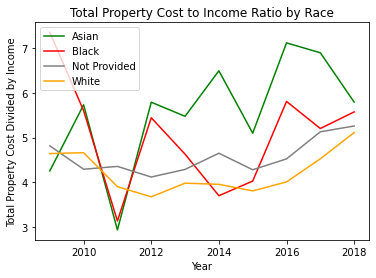

In [9]:
# line graph of property cost to income ratio by race. Disclude indigenous & pacific islander since 
# there are not consistent datapoints for each year
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Total/Inc Ratio"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Total/Inc Ratio"]], color="red", label="Black")
np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Total/Inc Ratio"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Total/Inc Ratio"]], color="orange", label="White")

plt.legend(handles=[asian, black, np, white], loc="best")
plt.title("Total Property Cost to Income Ratio by Race")
plt.ylabel("Total Property Cost Divided by Income")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"TotalbyRace")

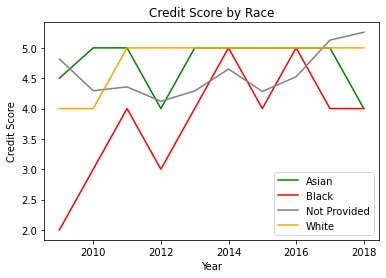

In [10]:
# create score for median credit score by race
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Credit Score"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Credit Score"]], color="red", label="Black")
np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Total/Inc Ratio"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Credit Score"]], color="orange", label="White")

plt.legend(handles=[asian, black, np, white], loc="best")
plt.title("Credit Score by Race")
plt.ylabel("Credit Score")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"CreditbyRace")




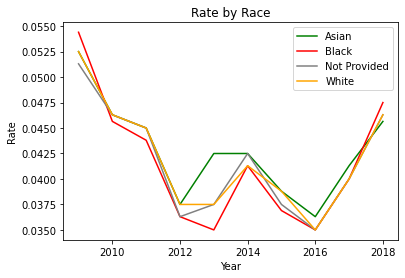

In [11]:
# create plot for median interest rate by race
asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Rate"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Rate"]], color="red", label="Black")
np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Rate"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Rate"]], color="orange", label="White")

plt.legend(handles=[asian, black, np, white], loc="best")
plt.title("Rate by Race")
plt.ylabel("Rate")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"RatebyRace")


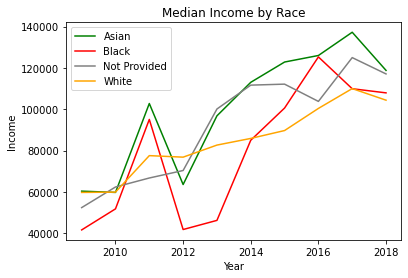

In [12]:
# create plot of median income by race

asian, = plt.plot(df.loc[df["Bins"]=="Asian", ["Income"]], color="green", label="Asian")
black, = plt.plot(df.loc[df["Bins"]=="Black", ["Income"]], color="red", label="Black")
np, = plt.plot(df.loc[df["Bins"]=="Not Provided", ["Income"]], color="gray", label="Not Provided")
white, = plt.plot(df.loc[df["Bins"]=="White", ["Income"]], color="orange", label="White")

plt.legend(handles=[asian, black, np, white], loc="best")
plt.title("Median Income by Race")
plt.ylabel("Income")
plt.xlabel("Year")
plt.tight_layout
plt.savefig(f"IncomebyRace")